In [14]:
#In this notebook, I will be examining the implementation of new technologies or construction over a 5 year period and if it has had a reduction in the number of crashes in NSW. 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import chi2_contingency

In [32]:
# File to Load 
crash_data_path = ("Resources/CSV_CRASH_DATA.csv")

# Assign csv info into crash_data 
crash_data = pd.read_csv(crash_data_path)

crash_data.head()


,Crash ID,Degree of crash,Degree of crash - detailed,Reporting year,Year of crash,Month of crash,Day of week of crash,Two-hour intervals,Street of crash,Street type,...,DCA - description,DCA supplement,First impact type,Key TU type,Other TU type,No. of traffic units involved,No. killed,No. seriously injured,No. moderately injured,No. minor-other injured
0,1151002,Non-casualty (towaway),Non-casualty (towaway),2018,2018,February,Thursday,06:00 - 07:59,SACKVILLE,ST,...,Manov - Reverse in traffic,NaN,Other angle,Car (sedan/hatch),Car (sedan/hatch),3,0,0,0,0
1,1158000,Fatal,Fatal,2018,2018,January,Monday,00:01 - 01:59,BRUNKER,RD,...,On path - Parked,NaN,Other angle,Car (sedan/hatch),Light truck utility(from 2018),2,1,2,0,0
2,1158001,Fatal,Fatal,2018,2018,January,Monday,08:00 - 09:59,CLARENCE,WAY,...,Off left bend into obj,Right,Vehicle - Object,Car (sedan/hatch),NaN,1,1,0,0,0
3,1158002,Fatal,Fatal,2018,2018,January,Monday,02:00 - 03:59,RAILWAY,RD,...,Ped - On carriageway,NaN,Vehicle - Pedestrian,Car (sedan/hatch),Pedestrian,2,1,0,0,0
4,1158515,Fatal,Fatal,2018,2018,January,Tuesday,20:00 - 21:59,CHRISTINA,RD,...,Ped - Far side,NaN,Vehicle - Pedestrian,Car (sedan/hatch),Pedestrian,2,1,0,0,0


In [33]:
#Dropping unwanted columns 
clean_crash_data = crash_data.drop(columns=[
    "Street of crash",
    "Street type",
    "DCA supplement",
    "Key TU type",
    "Other TU type",
    "Reporting year",
    "Street of crash",
    "Street type",
    "Distance",
    "Direction",
    "Identifying feature",
    "Identifying feature type",
    "Key TU type",
    "Route no.",
    "School zone location",
    "School zone active",
    "Type of location",
    "Latitude",
    "Longitude",
    "LGA",
    "Urbanisation",
    "Conurbation 1",
    "Alignment",
    "Primary permanent feature",
    "Primary temporary feature",
    "Primary hazardous feature",
    "Signals operation",
    "Other traffic control",
    "RUM - code",
    "RUM - description",
    "DCA - code",
    "DCA - description",
    "DCA supplement",
    "No. of traffic units involved",
    "Degree of crash - detailed"
    

])

clean_crash_data.head(5)

,Crash ID,Degree of crash,Year of crash,Month of crash,Day of week of crash,Two-hour intervals,Town,Street lighting,Road surface,Surface condition,Weather,Natural lighting,Speed limit,Road classification (admin),First impact type,No. killed,No. seriously injured,No. moderately injured,No. minor-other injured
0,1151002,Non-casualty (towaway),2018,February,Thursday,06:00 - 07:59,CANLEY VALE,Unknown / not stated,Sealed,Dry,Fine,Daylight,60 km/h,Regional,Other angle,0,0,0,0
1,1158000,Fatal,2018,January,Monday,00:01 - 01:59,YAGOONA,On,Sealed,Dry,Fine,Darkness,60 km/h,Regional,Other angle,1,2,0,0
2,1158001,Fatal,2018,January,Monday,08:00 - 09:59,UPPER FINE FLOWER,Nil,Unsealed,Dry,Fine,Daylight,100 km/h,Regional,Vehicle - Object,1,0,0,0
3,1158002,Fatal,2018,January,Monday,02:00 - 03:59,NEW LAMBTON,On,Sealed,Dry,Fine,Darkness,50 km/h,Local,Vehicle - Pedestrian,1,0,0,0
4,1158515,Fatal,2018,January,Tuesday,20:00 - 21:59,VILLAWOOD,On,Sealed,Dry,Overcast,Darkness,60 km/h,Regional,Vehicle - Pedestrian,1,0,0,0


# No. of people killed over the years 

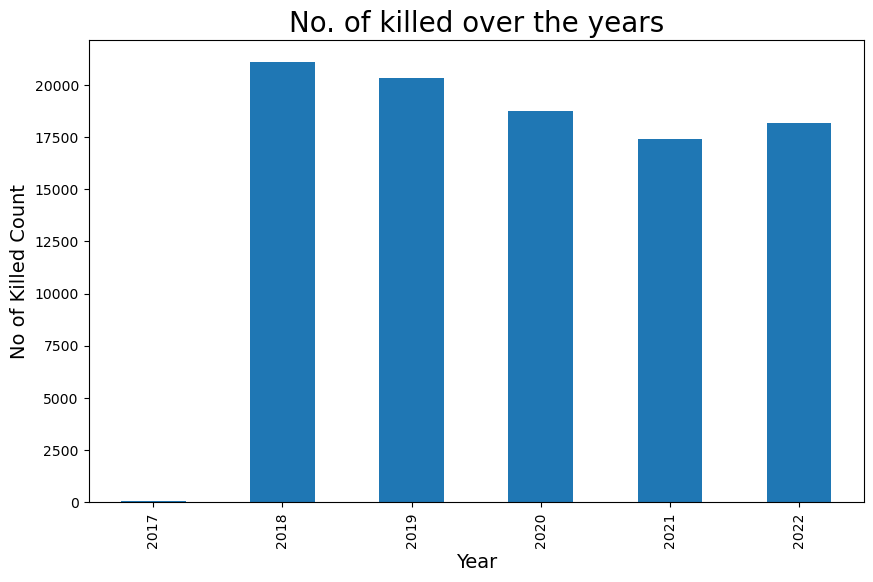

In [34]:
#Set new dataframe for the years and no. of people killed. 
killed_year_df = clean_crash_data[["No. killed","Year of crash"]]

#Group by the year
groupby_year = killed_year_df.groupby(["Year of crash"])

#Count the no. of people killed per year 
count = groupby_year["No. killed"].count()

#Setting a new dataframe for the no. of people killed per year 
groupby_year = pd.DataFrame({"No of Killed Count": count
                           })
#Plotting the bar chart
groupby_year.plot(kind="bar", figsize=(10,6), legend=False)

plt.title("No. of killed over the years", fontsize=20)
plt.ylabel("No of Killed Count",fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.show()

In [35]:
#Shows signs of a decrease in fatalities over the years. 
#Predicted to decrease more in the future years. 

# Sealed Roads vs Unsealed Roads

In [36]:
# Filter the data for sealed and unsealed road surfaces
sealed_crashes = clean_crash_data[clean_crash_data['Road surface'] == 'Sealed']
unsealed_crashes = clean_crash_data[clean_crash_data['Road surface'] == 'Unsealed']

# Calculate summary statistics for sealed crashes
sealed_summary = sealed_crashes.groupby('Year of crash')['No. killed'].count().reset_index()
sealed_summary['Type'] = 'Sealed'

# Calculate summary statistics for unsealed crashes
unsealed_summary = unsealed_crashes.groupby('Year of crash')['No. killed'].count().reset_index()
unsealed_summary['Type'] = 'Unsealed'

# Combine the summaries into one DataFrame
combined_summary = pd.concat([sealed_summary, unsealed_summary])

# Display the combined summary
print(combined_summary)

   Year of crash  No. killed      Type
0           2017          65    Sealed
1           2018       20568    Sealed
2           2019       19880    Sealed
3           2020       18224    Sealed
4           2021       16955    Sealed
5           2022       17740    Sealed
0           2017           1  Unsealed
1           2018         513  Unsealed
2           2019         457  Unsealed
3           2020         523  Unsealed
4           2021         436  Unsealed
5           2022         440  Unsealed


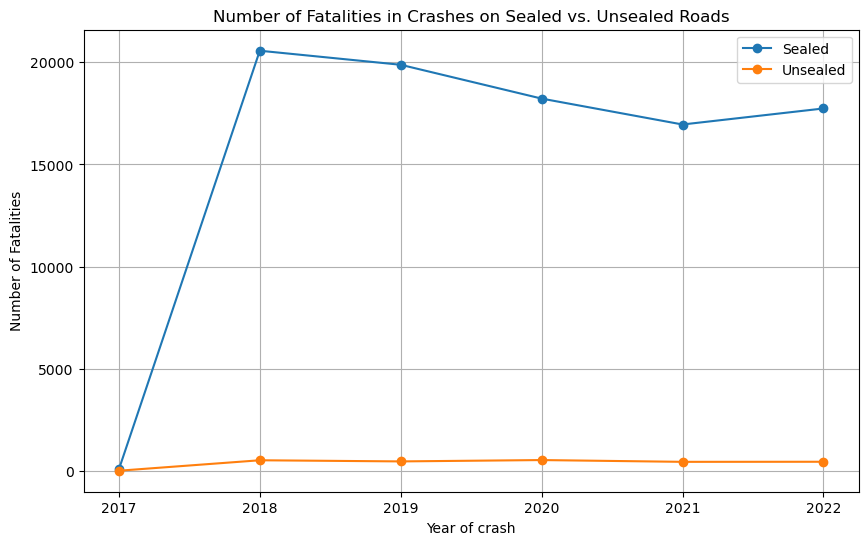

In [37]:
#Plotting the bar chart 
plt.figure(figsize=(10, 6))
for label, df in combined_summary.groupby('Type'):
    plt.plot(df['Year of crash'], df['No. killed'], marker='o', label=label)

plt.xlabel('Year of crash')
plt.ylabel('Number of Fatalities')
plt.title('Number of Fatalities in Crashes on Sealed vs. Unsealed Roads')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Although most fatalities were on sealed roads, there is a steady decrease in fatalities over the years. 
# Signs of improvement even on sealed roads, as unsealed roads remained constant. 

# Number of people killed on street lighting 

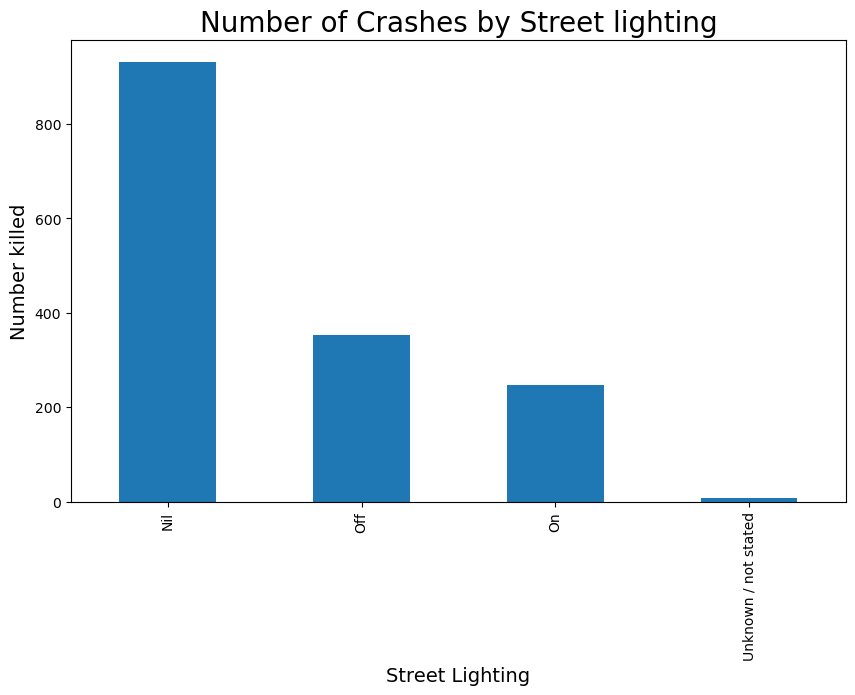

In [39]:

# Set new DataFrame for the street lighting condition and number of crashes
lighting_crash_df = clean_crash_data[["Street lighting", "No. killed"]]

# Group by the street lighting condition
groupby_lighting = lighting_crash_df.groupby(["Street lighting"]).sum()

# Plotting the bar chart
groupby_lighting.plot(kind="bar", figsize=(10, 6), legend=False)

plt.title("Number of Crashes by Street lighting", fontsize=20)
plt.ylabel("Number killed", fontsize=14)
plt.xlabel("Street Lighting", fontsize=14)
plt.show()

In [41]:
# Create a contingency table
contingency_table = pd.crosstab(clean_crash_data['Street lighting'], clean_crash_data['No. killed'])

# Perform the chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("There is a correlation between street lighting and the no. of people killed.")
else:
    print("There is no correlation between street lighting and the no. of people killed.")

Chi-Square Statistic: 1336.2047955630953
P-Value: 8.71769584216188e-276
There is a correlation between street lighting and the no. of people killed.


In [ ]:
#Most crashes showed that there was no street lighting or was unknown.